# Project: Investigate a Dataset - Child Mortality, Vaccination Rate and Income Per Person from Gapminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This analysis aims to find out the relationships among child mortality, vaccination rates and income per person. 

Four indicator datasets are selected from Gapminder World https://www.gapminder.org. Each dataset presents data in different countries and tracked across the years.

###### 1. Health -> Child mortality (child_mortality.csv, year 1800 - 2100)
Death of children under five years of age per 1,000 live births.

###### 2. Health -> Vaccine -> Some vaccination rate (some_vacc_rate.csv, year 1980 - 2019)
The share of one-year-olds who have recieved at least one of the following vaccinations: BCG, DTP3, HepB3, HIB3, Measles 1st, Measles 2nd, PCV3, Pol3 or RotaC. This shows the number for the vaccine with the highest coverage.

###### 3. Health -> Vaccine -> Lowest vaccination rate among six basic vaccines (six_vacc_rate.csv, year 1994 - 2019)
The share of one-year-olds who have recieved all these six vaccinations BCG, DTP3, HepB3, HIB3, Measles 1st dose and Pol3. This shows the number for the vaccine with the lowest coverage.

###### 4. Economy -> Incomes & growth -> Income per person (GDP/capita, PPP$ inflation-adjusted) (income_per_person.csv, year 1800 - 2050)
Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).



### Question(s) for Analysis

1. Have certain regions of the world been higher or lower in child mortality?<br>
<br>
2. What is the general trend of child mortality over the years? Do some countries give more noticable change on child mortality over the years?<br>
<br>
3. How are child mortality and vaccination rates correlated?<br>
<br>
4. How are child mortality and income per person correlated?

In [137]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [138]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [139]:
# Please restart the Kernal and rerun all the cells if "unexpected keyword argument 'max_rows'" TypeError occurs

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [140]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_child_mortality = pd.read_csv('child_mortality.csv', index_col='country')
df_some_vacc_rate = pd.read_csv('some_vacc_rate.csv', index_col='country')
df_six_vacc_rate = pd.read_csv('six_vacc_rate.csv', index_col='country')
df_income_per_person = pd.read_csv('income_per_person.csv', index_col='country')

###### child_mortality.csv

In [141]:
# Return the first 10 rows of child_mortality.csv
df_child_mortality.head(10)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13
Argentina,402.0,402.0,402.0,402.0,402.0,402.0,402.0,402.0,402.0,402.0,...,2.80,2.77,2.74,2.71,2.68,2.65,2.62,2.59,2.57,2.57
Armenia,371.0,371.0,370.0,370.0,369.0,369.0,368.0,368.0,367.0,367.0,...,3.69,3.67,3.64,3.61,3.58,3.55,3.52,3.48,3.44,3.44
Antigua and Barbuda,474.0,470.0,466.0,462.0,458.0,455.0,451.0,447.0,444.0,440.0,...,1.98,1.96,1.94,1.92,1.90,1.88,1.86,1.84,1.83,1.83
Australia,391.0,391.0,391.0,391.0,391.0,391.0,391.0,391.0,391.0,391.0,...,0.66,0.64,0.63,0.61,0.59,0.57,0.56,0.54,0.52,0.52


In [142]:
# Check the dimensions of the dataframe
df_child_mortality.shape

(197, 301)

In [143]:
# Check the basic info of the dataframe
df_child_mortality.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 301 columns):
1800    185 non-null float64
1801    185 non-null float64
1802    185 non-null float64
1803    185 non-null float64
1804    185 non-null float64
1805    185 non-null float64
1806    185 non-null float64
1807    185 non-null float64
1808    185 non-null float64
1809    185 non-null float64
1810    185 non-null float64
1811    185 non-null float64
1812    185 non-null float64
1813    185 non-null float64
1814    185 non-null float64
1815    185 non-null float64
1816    185 non-null float64
1817    185 non-null float64
1818    185 non-null float64
1819    185 non-null float64
1820    185 non-null float64
1821    185 non-null float64
1822    185 non-null float64
1823    185 non-null float64
1824    185 non-null float64
1825    185 non-null float64
1826    185 non-null float64
1827    185 non-null float64
1828    185 non-null float64
1829    185 non-null float64
1830    185 no

There are totally 197 countries over the years from 1800 to 2100.<br>
All columns are in float64 type.<br>
Null values are found for years before 1950.

In [144]:
# Define a function to check for continuity of the year column
def yr_col_continuity(df, min_yr, max_yr):
    return [int(c) for c in df.columns.tolist()] == list(range(min_yr, max_yr+1))

In [145]:
# Are the years consecutive over the range 1800 - 2100?
yr_col_continuity(df_child_mortality, 1800, 2100)

True

No missing year is found over the range.

In [146]:
# Duplicated rows found?
sum(df_child_mortality.duplicated())

0

There are no suspicious duplicated rows.

###### some_vacc_rate.csv

In [147]:
# Return the first 10 rows of some_vacc_rate.csv
df_some_vacc_rate.head(10)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.0,3.0,10.0,10.0,16.0,17.0,18.0,31.0,40.0,38.0,...,68.0,71,78,72,74,76,78,78,78,78
Angola,NaN,NaN,NaN,26.0,35.0,44.0,44.0,55.0,56.0,48.0,...,79.0,74,73,71,72,64,59,69,72,69
Albania,94.0,94.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,...,99.0,99,99,99,99,99,99,99,99,99
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99,99,96,97,97,98,99,99,99
United Arab Emirates,34.0,45.0,46.0,51.0,59.0,76.0,78.0,92.0,93.0,96.0,...,98.0,96,96,98,99,99,99,99,99,99
Argentina,62.0,77.0,77.0,79.0,79.0,90.0,99.0,94.0,91.0,92.0,...,99.0,99,99,99,99,96,92,95,99,94
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,98,97,99,99,99,99,99,99,99
Antigua and Barbuda,54.0,79.0,86.0,99.0,94.0,99.0,96.0,99.0,99.0,99.0,...,99.0,99,98,99,99,99,92,99,96,99
Australia,33.0,43.0,68.0,94.0,94.0,94.0,95.0,95.0,95.0,95.0,...,94.0,94,94,94,94,95,95,95,95,96


In [148]:
# Check the dimensions of the dataframe
df_some_vacc_rate.shape

(192, 40)

In [149]:
# Check the basic info of the dataframe
df_some_vacc_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 40 columns):
1980    108 non-null float64
1981    131 non-null float64
1982    137 non-null float64
1983    147 non-null float64
1984    152 non-null float64
1985    155 non-null float64
1986    158 non-null float64
1987    161 non-null float64
1988    162 non-null float64
1989    162 non-null float64
1990    162 non-null float64
1991    163 non-null float64
1992    181 non-null float64
1993    185 non-null float64
1994    186 non-null float64
1995    186 non-null float64
1996    186 non-null float64
1997    187 non-null float64
1998    187 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    190 non-null float64
2003    190 non-null float64
2004    190 non-null float64
2005    190 non-null float64
2006    191 non-null float64
2007    191 non-null float64
2008    191 non-null float64
2009    191 non-null float64
2010    191 non

There are totally 192 countries over the years from 1980 to 2019.<br> 
Columns are in float64 and int64 types.<br>
Null values are found for some years.

In [150]:
# Are the years consecutive over the range 1980 - 2019?
yr_col_continuity(df_some_vacc_rate, 1980, 2019)

True

No missing year is found over the range.

In [151]:
# Duplicated rows found?
sum(df_some_vacc_rate.duplicated())

0

There are no suspicious duplicated rows.

###### six_vacc_rate.csv

In [152]:
# Return the first 10 rows of six_vacc_rate.csv
df_six_vacc_rate.head(10)

,1994,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,64.0,59.0,57.0,60.0,63.0,64.0,64.0,64.0,64.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,50.0,52.0,48.0,55.0,51.0,40.0,42.0,50.0,51.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,97.0,96.0,99.0,98.0,97.0,96.0,96.0,94.0,95.0
United Arab Emirates,NaN,NaN,NaN,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,94.0,95.0,94.0,94.0,90.0,96.0,99.0,95.0,95.0,94.0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,66.0,73.0,81.0,88.0,...,94.0,91.0,90.0,90.0,92.0,89.0,87.0,84.0,84.0,84.0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,95.0,95.0,95.0,93.0,94.0,94.0,94.0,92.0,92.0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.0,88.0,93.0,94.0,96.0,97.0,95.0,95.0,94.0
Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,82.0,...,92.0,90.0,93.0,95.0,92.0,93.0,93.0,90.0,88.0,92.0
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,...,68.0,70.0,74.0,68.0,65.0,67.0,68.0,70.0,71.0,71.0


In [153]:
# Check the dimensions of the dataframe
df_six_vacc_rate.shape

(156, 24)

In [154]:
# Check the basic info of the dataframe
df_six_vacc_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 24 columns):
1994    1 non-null float64
1997    2 non-null float64
1998    8 non-null float64
1999    15 non-null float64
2000    24 non-null float64
2001    29 non-null float64
2002    42 non-null float64
2003    48 non-null float64
2004    52 non-null float64
2005    61 non-null float64
2006    68 non-null float64
2007    76 non-null float64
2008    90 non-null float64
2009    113 non-null float64
2010    126 non-null float64
2011    135 non-null float64
2012    139 non-null float64
2013    145 non-null float64
2014    148 non-null float64
2015    150 non-null float64
2016    149 non-null float64
2017    148 non-null float64
2018    148 non-null float64
2019    149 non-null float64
dtypes: float64(24)
memory usage: 30.5+ KB


In [155]:
# Are the years consecutive over the range 1994 - 2019?
yr_col_continuity(df_six_vacc_rate, 1994, 2019)

False

There are totally 156 countries over the year 1994 to 2019, but years 1995 and 1996 are unavailable.<br>
Columns are all in float64 types.<br>
Null values are found for some years.

In [156]:
# Duplicated rows found?
sum(df_six_vacc_rate.duplicated())

0

There are no suspicious duplicated rows.

###### income_per_person.csv

In [157]:
# Return the first 10 rows of income_per_person.csv
df_income_per_person.head(10)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,674,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
Angola,691,693,697,700,702,705,709,712,716,718,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
Albania,746,746,746,746,746,747,747,747,747,747,...,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,...,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,...,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k
Argentina,1710,1710,1720,1730,1730,1740,1740,1750,1760,1760,...,27.8k,28.4k,29k,29.6k,30.2k,30.9k,31.5k,32.2k,32.9k,33.6k
Armenia,575,575,575,575,575,575,575,575,575,575,...,23.7k,24.2k,24.8k,25.3k,25.8k,26.4k,26.9k,27.5k,28.1k,28.7k
Antigua and Barbuda,846,846,846,846,846,846,846,847,847,847,...,28.9k,29.5k,30.1k,30.8k,31.4k,32.1k,32.8k,33.5k,34.2k,34.9k
Australia,913,919,924,929,935,940,945,950,956,961,...,70.7k,72.2k,73.7k,75.3k,76.9k,78.5k,80.2k,81.9k,83.6k,85.4k


In [158]:
# Check the dimensions of the dataframe
df_income_per_person.shape

(195, 251)

In [159]:
# Check the basic info of the dataframe
df_income_per_person.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 251 columns):
1800    195 non-null int64
1801    195 non-null int64
1802    195 non-null int64
1803    195 non-null int64
1804    195 non-null int64
1805    195 non-null int64
1806    195 non-null int64
1807    195 non-null int64
1808    195 non-null int64
1809    195 non-null int64
1810    195 non-null int64
1811    195 non-null int64
1812    195 non-null int64
1813    195 non-null int64
1814    195 non-null int64
1815    195 non-null int64
1816    195 non-null int64
1817    195 non-null int64
1818    195 non-null int64
1819    195 non-null int64
1820    195 non-null int64
1821    195 non-null int64
1822    195 non-null int64
1823    195 non-null int64
1824    195 non-null int64
1825    195 non-null int64
1826    195 non-null int64
1827    195 non-null int64
1828    195 non-null int64
1829    195 non-null int64
1830    195 non-null int64
1831    195 non-null int64
1832    195 non-null

There are totally 195 countries over the year 1800 to 2050.<br>
Columns are in int64 and string types (as some numbers are represented in thousands 'k').

In [160]:
# Are the years consecutive over the range 1800 - 2050?
yr_col_continuity(df_income_per_person, 1800, 2050)

True

No missing year is found over the range.

In [161]:
# Check for any null values in the columns
df_income_per_person.isnull().values.any()

False

There is no null values for this dataframe.

In [162]:
# Duplicated rows found?
sum(df_income_per_person.duplicated())

0

There are no suspicious duplicated rows.


### Data Cleaning


###### Child mortality

As null values are found for years before 1950, and future data is not wanted here. The data of years before 1950 and after 2020 are trimmed.

In [163]:
# Drop years before 1950
yr_cols=[str(c) for c in list(range(1800, 1950))]
df_child_mortality_v2 = df_child_mortality.drop(columns=yr_cols)
# Drop years after 2020
yr_cols=[str(c) for c in list(range(2021, 2101))]
df_child_mortality_v2 = df_child_mortality_v2.drop(columns=yr_cols)

In [164]:
df_child_mortality_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 71 columns):
1950    197 non-null float64
1951    197 non-null float64
1952    197 non-null float64
1953    197 non-null float64
1954    197 non-null float64
1955    197 non-null float64
1956    197 non-null float64
1957    197 non-null float64
1958    197 non-null float64
1959    197 non-null float64
1960    197 non-null float64
1961    197 non-null float64
1962    197 non-null float64
1963    197 non-null float64
1964    197 non-null float64
1965    197 non-null float64
1966    197 non-null float64
1967    197 non-null float64
1968    197 non-null float64
1969    197 non-null float64
1970    197 non-null float64
1971    197 non-null float64
1972    197 non-null float64
1973    197 non-null float64
1974    197 non-null float64
1975    197 non-null float64
1976    197 non-null float64
1977    197 non-null float64
1978    197 non-null float64
1979    197 non-null float64
1980    197 non

Now there are 71 years of child mortality data for further analysis.

###### Some vaccination rate

As some columns are found to be in int64 type (Year 2011 - 2019), they are converted to float64 type so that the column types of all columns are aligned for the ease of analysis, while preserving the precision of values.

In [165]:
# Create a dictionary with the target columns (Year 2011 - 2019) as keys and 'float64' as value
cols_float64 = { str(k):'float64' for k in range(2011, 2020) }
# Convert the target columns to float64 type and store as a new dataframe
df_some_vacc_rate_v2 = df_some_vacc_rate.astype(cols_float64, copy=True)

In [166]:
df_some_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 40 columns):
1980    108 non-null float64
1981    131 non-null float64
1982    137 non-null float64
1983    147 non-null float64
1984    152 non-null float64
1985    155 non-null float64
1986    158 non-null float64
1987    161 non-null float64
1988    162 non-null float64
1989    162 non-null float64
1990    162 non-null float64
1991    163 non-null float64
1992    181 non-null float64
1993    185 non-null float64
1994    186 non-null float64
1995    186 non-null float64
1996    186 non-null float64
1997    187 non-null float64
1998    187 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    190 non-null float64
2003    190 non-null float64
2004    190 non-null float64
2005    190 non-null float64
2006    191 non-null float64
2007    191 non-null float64
2008    191 non-null float64
2009    191 non-null float64
2010    191 non

To fill the null values, the following approach is used:<br>
Step 1. Fill all null values for Year 1980 with its mean value<br>
Step 2. For each country/row, fill the rest of the null values using interpolate().<br>
interpolate() is used as it is better in maintaining the data trend comparing to mean values hardcoding.

In [167]:
# Fill all null values for Year 1980 by its mean value
df_some_vacc_rate_v2['1980'].fillna(df_some_vacc_rate_v2['1980'].mean(), inplace=True)

In [168]:
df_some_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 40 columns):
1980    192 non-null float64
1981    131 non-null float64
1982    137 non-null float64
1983    147 non-null float64
1984    152 non-null float64
1985    155 non-null float64
1986    158 non-null float64
1987    161 non-null float64
1988    162 non-null float64
1989    162 non-null float64
1990    162 non-null float64
1991    163 non-null float64
1992    181 non-null float64
1993    185 non-null float64
1994    186 non-null float64
1995    186 non-null float64
1996    186 non-null float64
1997    187 non-null float64
1998    187 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    190 non-null float64
2003    190 non-null float64
2004    190 non-null float64
2005    190 non-null float64
2006    191 non-null float64
2007    191 non-null float64
2008    191 non-null float64
2009    191 non-null float64
2010    191 non

In [169]:
# For each country/row, fill the rest of the null values using interpolate
df_some_vacc_rate_v2 = df_some_vacc_rate_v2.interpolate(method='linear', axis=1)

In [170]:
df_some_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Afghanistan to Zimbabwe
Data columns (total 40 columns):
1980    192 non-null float64
1981    192 non-null float64
1982    192 non-null float64
1983    192 non-null float64
1984    192 non-null float64
1985    192 non-null float64
1986    192 non-null float64
1987    192 non-null float64
1988    192 non-null float64
1989    192 non-null float64
1990    192 non-null float64
1991    192 non-null float64
1992    192 non-null float64
1993    192 non-null float64
1994    192 non-null float64
1995    192 non-null float64
1996    192 non-null float64
1997    192 non-null float64
1998    192 non-null float64
1999    192 non-null float64
2000    192 non-null float64
2001    192 non-null float64
2002    192 non-null float64
2003    192 non-null float64
2004    192 non-null float64
2005    192 non-null float64
2006    192 non-null float64
2007    192 non-null float64
2008    192 non-null float64
2009    192 non-null float64
2010    192 non

Now all the fields are non-null.

###### Lowest vaccination rate among six basic vaccines (Six vaccination rate)

This dataframe has many 'blank' fields.<br>
<br>
First of all, the data of years before 2008 are trimmed as over half of the values are null.

In [171]:
# Drop years before 2008
yr_cols=[str(c) for c in list(range(1994, 2008)) if c not in (1995, 1996)]
df_six_vacc_rate_v2 = df_six_vacc_rate.drop(columns=yr_cols)

In [172]:
df_six_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
2008    90 non-null float64
2009    113 non-null float64
2010    126 non-null float64
2011    135 non-null float64
2012    139 non-null float64
2013    145 non-null float64
2014    148 non-null float64
2015    150 non-null float64
2016    149 non-null float64
2017    148 non-null float64
2018    148 non-null float64
2019    149 non-null float64
dtypes: float64(12)
memory usage: 15.8+ KB


The year range is now shrunk to 12 years. There are also countries/rows with most null values over the year columns. These countries are also removed.

In [173]:
# Check for any countries with null values for over 6 years between 2008 and 2019
df_six_vacc_rate_v2[df_six_vacc_rate_v2.isnull().sum(axis=1) > 6]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,
Czech Republic,97.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,99.0,99.0,99.0,99.0
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
Monaco,89.0,89.0,89.0,89.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,45.0,47.0,49.0,49.0
Slovak Republic,98.0,97.0,98.0,97.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 countries with null values for over 6 years between 2008 and 2019.

In [174]:
# Drop countries with null values for over 6 years
df_six_vacc_rate_v2 = df_six_vacc_rate_v2.dropna(thresh=6)

In [175]:
df_six_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
2008    87 non-null float64
2009    110 non-null float64
2010    124 non-null float64
2011    133 non-null float64
2012    137 non-null float64
2013    145 non-null float64
2014    148 non-null float64
2015    148 non-null float64
2016    147 non-null float64
2017    146 non-null float64
2018    146 non-null float64
2019    146 non-null float64
dtypes: float64(12)
memory usage: 15.0+ KB


Note that the number of entries goes down from 156 to 148.

To fill the remaining null values, the following approach is used:<br>
Step 1. Fill all null values for Year 2008 and 2019 with its mean value<br>
Step 2. For each country/row, fill the rest of the null values using interpolate().<br>
interpolate() is used as it is better in maintaining the data trend comparing to mean values hardcoding.

In [176]:
# Fill all null values for Year 2008 by its mean value
df_six_vacc_rate_v2['2008'].fillna(df_six_vacc_rate_v2['2008'].mean(), inplace=True)
# Fill all null values for Year 2019 by its mean value
df_six_vacc_rate_v2['2019'].fillna(df_six_vacc_rate_v2['2019'].mean(), inplace=True)

In [177]:
df_six_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
2008    148 non-null float64
2009    110 non-null float64
2010    124 non-null float64
2011    133 non-null float64
2012    137 non-null float64
2013    145 non-null float64
2014    148 non-null float64
2015    148 non-null float64
2016    147 non-null float64
2017    146 non-null float64
2018    146 non-null float64
2019    148 non-null float64
dtypes: float64(12)
memory usage: 15.0+ KB


In [178]:
# For each country/row, fill the rest of the null values using interpolate
df_six_vacc_rate_v2 = df_six_vacc_rate_v2.interpolate(method='linear', axis=1)

In [179]:
df_six_vacc_rate_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
2008    148 non-null float64
2009    148 non-null float64
2010    148 non-null float64
2011    148 non-null float64
2012    148 non-null float64
2013    148 non-null float64
2014    148 non-null float64
2015    148 non-null float64
2016    148 non-null float64
2017    148 non-null float64
2018    148 non-null float64
2019    148 non-null float64
dtypes: float64(12)
memory usage: 15.0+ KB


Now all the fields are non-null.

###### Income per person

The following data type conversions are performed for the ease of further analysis:
Step 1. Convert columns in object/string types (with some numbers represented in thousands 'k') to digit representation, then to int64.
Step 2. Convert all columns from int64 type to float64 type

In [180]:
# Step 1. Convert columns in object/string types (with some numbers represented in thousands 'k') to digit representation, then to int64.

# Prepare a list storing years with object/string type values
yr_cols = [ str(i) for i in range(1901, 2051) if i not in (1902, 1904) ]

# Create a copy of Income per person dataframe
df_income_per_person_v2 = df_income_per_person.copy()

# Convert numbers represented in thousands 'k' to digit representation 
for yr in yr_cols:
    df_income_per_person_v2[yr] = df_income_per_person_v2[yr].apply(
        lambda x: int(float(x.replace('k','')) * 1000) if x.endswith('k') else int(x)
    )
    
df_income_per_person_v2.head(20)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,674,674,674,674,674,674,674,674,674,674,...,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
Angola,691,693,697,700,702,705,709,712,716,718,...,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
Albania,746,746,746,746,746,747,747,747,747,747,...,24500,25000,25500,26100,26600,27200,27800,28300,28900,29600
Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,...,108000,111000,113000,116000,118000,121000,123000,126000,128000,131000
United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,...,74500,76100,77700,79300,81000,82700,84500,86300,88100,90000
Argentina,1710,1710,1720,1730,1730,1740,1740,1750,1760,1760,...,27800,28400,29000,29600,30200,30900,31500,32200,32900,33600
Armenia,575,575,575,575,575,575,575,575,575,575,...,23700,24200,24800,25300,25800,26400,26900,27500,28100,28700
Antigua and Barbuda,846,846,846,846,846,846,846,847,847,847,...,28900,29500,30100,30800,31400,32100,32800,33500,34200,34900
Australia,913,919,924,929,935,940,945,950,956,961,...,70700,72200,73700,75300,76900,78500,80200,81900,83600,85400


In [181]:
df_income_per_person_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 251 entries, 1800 to 2050
dtypes: int64(251)
memory usage: 383.9+ KB


In [182]:
# Step 2. Convert all columns from int64 type to float64 type
df_income_per_person_v2 = df_income_per_person_v2.astype(float)

In [183]:
df_income_per_person_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Columns: 251 entries, 1800 to 2050
dtypes: float64(251)
memory usage: 383.9+ KB


As the income per person data will be compared with child mortality data, the year columns can be trimmed to match those of the child mortality dataframe. i.e. only keeps year range from 1950 to 2020.

In [184]:
# Drop years before 1950
yr_cols=[str(c) for c in list(range(1800, 1950))]
df_income_per_person_v3 = df_income_per_person_v2.drop(columns=yr_cols)
# Drop years after 2020
yr_cols=[str(c) for c in list(range(2021, 2051))]
df_income_per_person_v3 = df_income_per_person_v3.drop(columns=yr_cols)

In [185]:
df_income_per_person_v3.columns

Index(['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Have certain regions of the world been higher or lower in child mortality?

Calculate the mean child mortality of each countries over the years, then find out 
+ The top 20 countries (~10% of the total 197 countries) with the highest mean child mortality.
+ The top 20 countries (~10% of the total 197 countries) with the lowest mean child mortality.

In [186]:
# Calculate the mean child mortality of each countries over the years
df_cm_mean_by_country = df_child_mortality_v2.mean(axis=1)
# Sort the countries by the mean values in descending order and select the first 20 rows
df_cm_mean_by_country.sort_values(ascending=False).head(20)

country
Sierra Leone                277.647887
Mali                        273.115493
Niger                       264.376056
South Sudan                 251.845070
Guinea                      243.895775
Malawi                      238.302817
Burkina Faso                231.564789
Nigeria                     229.845070
Guinea-Bissau               228.050704
Liberia                     224.273239
Angola                      223.870423
Chad                        222.366197
Afghanistan                 219.621127
Mozambique                  217.783099
Gambia                      211.892958
Yemen                       211.394366
Somalia                     205.267606
Benin                       204.630986
Equatorial Guinea           201.905634
Central African Republic    201.507042
dtype: float64

Among the top 20 countries with the highest mean child mortality, 18 of them are Africa countries. In particular, over half of them (11) are located in West Africa.

| Country | Region |
|:--------|-------:|
|Sierra Leone | West Africa|
|Mali | West Africa|
|Niger | West Africa|
|South Sudan | North East Africa|
|Guinea | West Africa|
|Malawi | South East Africa|
|Burkina Faso | West Africa|
|Nigeria | West Africa|
|Guinea-Bissau | West Africa|
|Liberia | West Africa|
|Angola South | West Africa|
|Chad | Central Africa|
|Afghanistan | South Asia|
|Mozambique | East Africa|
|Gambia | West Africa|
|Yemen | South West Asia|
|Somalia | East Africa|
|Benin | West Africa|
|Equatorial Guinea | Central Africa|
|Central African Republic | Central Africa |

In [187]:
# Sort the countries by the mean values in ascending order and select the first 20 rows
df_cm_mean_by_country.sort_values(ascending=True).head(20)

country
Monaco             9.325211
Sweden             9.854648
Iceland           10.825775
Norway            11.769859
Netherlands       11.960423
Finland           12.581127
Denmark           12.722394
Switzerland       13.484085
Australia         13.796761
Slovenia          14.436901
United Kingdom    14.557746
France            15.196901
New Zealand       15.572676
Canada            16.110141
United States     16.704366
Ireland           17.220986
Japan             17.558028
Belgium           17.563521
Germany           18.691831
Luxembourg        18.982254
dtype: float64

Among the top 20 countries with the lowest mean child mortality, 15 of them are European countries. Japan is the only Asian country in this ranking.

| Country | Region |
|:--------|-------:|
|Monaco | Europe|
|Sweden | Europe|
|Iceland | Europe|
|Norway | Europe|
|Netherlands | Europe|
|Finland | Europe|
|Denmark | Europe|
|Switzerland | Europe|
|Australia | Oceania|
|Slovenia | Europe|
|United Kingdom | Europe|
|France | Europe|
|New Zealand | Oceania|
|Canada | North America|
|United States | North America|
|Ireland | Europe|
|Japan | East Asia|
|Belgium | Europe|
|Germany | Europe|
|Luxembourg | Europe|

### 2. What is the general trend of child mortality over the years? Do some countries give more noticable change on child mortality over the years?

To show the trend, find out the mean child mortality of each year and plot a line chart.

In [188]:
# Check out the statistics of the dataframe
df_cm_stat = df_child_mortality_v2.describe()
df_cm_stat

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,206.959391,204.227411,199.027411,193.930457,188.904569,184.329442,179.755838,175.356853,170.653807,166.780203,...,35.506853,34.137563,32.880102,31.738426,30.670102,29.662081,28.685178,27.760254,26.958477,26.202386
std,110.561273,109.721985,109.304070,108.766082,108.464378,107.839938,107.066607,106.046105,105.487370,104.818974,...,36.337000,34.867749,33.548229,32.358894,31.230478,30.157859,29.191641,28.291314,27.523280,26.801627
min,20.000000,20.000000,20.000000,19.800000,19.600000,19.200000,18.700000,18.100000,17.400000,16.700000,...,2.520000,2.430000,2.340000,2.260000,2.180000,2.020000,1.850000,1.700000,1.630000,1.580000
25%,124.000000,122.000000,115.000000,109.000000,103.000000,97.000000,93.000000,86.700000,81.300000,78.200000,...,8.230000,8.000000,7.980000,7.700000,7.570000,7.430000,7.160000,7.020000,6.750000,6.520000
50%,197.000000,195.000000,191.000000,185.000000,175.000000,171.000000,163.000000,157.000000,151.000000,148.000000,...,19.200000,18.400000,18.100000,17.600000,17.700000,17.400000,17.000000,16.400000,15.800000,15.300000
75%,303.000000,298.000000,291.000000,284.000000,277.000000,268.000000,265.000000,257.000000,250.000000,247.000000,...,55.100000,52.200000,50.000000,48.200000,46.500000,44.900000,43.400000,41.900000,39.800000,38.500000
max,448.000000,445.000000,441.000000,438.000000,434.000000,432.000000,429.000000,428.000000,426.000000,425.000000,...,154.000000,147.000000,142.000000,138.000000,133.000000,129.000000,125.000000,122.000000,119.000000,117.000000


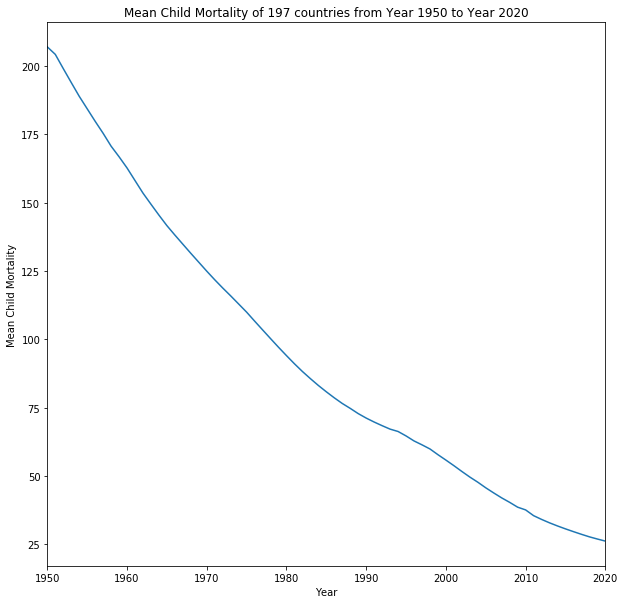

In [189]:
# Take the means and plot the line chart
df_cm_mean = df_cm_stat.loc['mean']
cm_mean_plot = df_cm_mean.plot(kind='line', figsize=(10,10), title='Mean Child Mortality of 197 countries from Year 1950 to Year 2020')
cm_mean_plot.set_xlabel("Year")
cm_mean_plot.set_ylabel("Mean Child Mortality");

The line chart shows that the Child Mortality has been decreasing since 1950. The decrease rate tends to slow down over the period as the curve flattens towards the right.

Known the decreasing trend, does the child mortality decrease more sharply for some countries? Compare the differences between min and max of each countries.

In [190]:
# Calculate the differences between min and max of each countries
df_cm_spd_by_country = df_child_mortality_v2.max(axis=1) - df_child_mortality_v2.min(axis=1)
# Sort the countries by the mean values in descending order and select the first 10 rows
df_cm_spd_by_country.sort_values(ascending=False).head(10)

country
Oman           391.60
Yemen          382.40
Iran           375.60
Timor-Leste    365.30
South Korea    362.09
Afghanistan    357.90
Maldives       356.13
Gambia         354.90
Mali           354.60
Bhutan         354.60
dtype: float64

Among the top 10 countries having the most noticable decrease on the child mortality, 7 of them are located near the South-Western Asia.

| Country | Region |
|:--------|-------:|
|Oman | South West Asia|
|Yemen | South West Asia|
|Iran | South West Asia|
|Timor-Leste | South East Asia|
|South Korea | East Asia|
|Afghanistan | South Asia|
|Maldives | South Asia|
|Gambia | West Africa|
|Mali | West Africa|
|Bhutan | South Asia|


### 3. How are child mortality and vaccination rates correlated?

+ Find out the mean child mortality and mean some vaccination rates by country, and do a scatter plot.
+ Find out the mean child mortality and mean lowest vaccination rates among six basic vaccines by country, and do a scatter plot.

Due to the year range difference, the year range of 'df_child_mortality_v2' will be shrunk to align with those of 'df_some_vacc_rate_v2' and 'df_six_vacc_rate_v2' before calculating the means.
+ df_child_mortality_v2: From 1950 to 2020
+ df_some_vacc_rate_v2: From 1980 to 2019
+ df_six_vacc_rate_v2: From 2008 to 2019

In [191]:
# Drop years before 1980 and after 2019
yr_cols=[str(c) for c in list(range(1950, 1980))]
yr_cols.append('2020')
df_child_mortality_1980_to_2019 = df_child_mortality_v2.drop(columns=yr_cols)
# Drop years before 1980 and after 2019
yr_cols=[str(c) for c in list(range(1950, 2008))]
yr_cols.append('2020')
df_child_mortality_2008_to_2019 = df_child_mortality_v2.drop(columns=yr_cols)

In [192]:
# Check out the new dataframe 'df_child_mortality_1980_to_2019'
df_child_mortality_1980_to_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 40 columns):
1980    197 non-null float64
1981    197 non-null float64
1982    197 non-null float64
1983    197 non-null float64
1984    197 non-null float64
1985    197 non-null float64
1986    197 non-null float64
1987    197 non-null float64
1988    197 non-null float64
1989    197 non-null float64
1990    197 non-null float64
1991    197 non-null float64
1992    197 non-null float64
1993    197 non-null float64
1994    197 non-null float64
1995    197 non-null float64
1996    197 non-null float64
1997    197 non-null float64
1998    197 non-null float64
1999    197 non-null float64
2000    197 non-null float64
2001    197 non-null float64
2002    197 non-null float64
2003    197 non-null float64
2004    197 non-null float64
2005    197 non-null float64
2006    197 non-null float64
2007    197 non-null float64
2008    197 non-null float64
2009    197 non-null float64
2010    197 non

The dataframe 'df_child_mortality_1980_to_2019' is created with year range from 1980 to 2019.

In [193]:
# Check out the new dataframe 'df_child_mortality_2008_to_2019'
df_child_mortality_2008_to_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, Afghanistan to Zimbabwe
Data columns (total 12 columns):
2008    197 non-null float64
2009    197 non-null float64
2010    197 non-null float64
2011    197 non-null float64
2012    197 non-null float64
2013    197 non-null float64
2014    197 non-null float64
2015    197 non-null float64
2016    197 non-null float64
2017    197 non-null float64
2018    197 non-null float64
2019    197 non-null float64
dtypes: float64(12)
memory usage: 20.0+ KB


The dataframe 'df_child_mortality_2008_to_2019' is created with year range from 2008 to 2019.

In [194]:
# Calculate the mean child mortality from 1980 to 2019 by country and store as a new dataframe
s_cm_mean_by_country_1980_to_2019 = df_child_mortality_1980_to_2019.mean(axis=1)
df_cm_mean_by_country_1980_to_2019 = pd.DataFrame(s_cm_mean_by_country_1980_to_2019)
# Calculate the mean some vaccination rates from 1980 to 2019 by country and store as a new dataframe
s_some_vr_mean_by_country = df_some_vacc_rate_v2.mean(axis=1)
df_some_vr_mean_by_country = pd.DataFrame(s_some_vr_mean_by_country)
# Calculate the mean child mortality from 2008 to 2019 by country and store as a new dataframe
s_cm_mean_by_country_2008_to_2019 = df_child_mortality_2008_to_2019.mean(axis=1)
df_cm_mean_by_country_2008_to_2019 = pd.DataFrame(s_cm_mean_by_country_2008_to_2019)
# Calculate the mean six vaccination rates from 2008 to 2019 by country and store as a new dataframe
s_six_vr_mean_by_country = df_six_vacc_rate_v2.mean(axis=1)
df_six_vr_mean_by_country = pd.DataFrame(s_six_vr_mean_by_country)

In [195]:
# Create a new dataframe by joining 'df_cm_mean_by_country_1980_to_2019' and 'df_some_vr_mean_by_country' on the country index
df_cm_join_some_vr = df_cm_mean_by_country_1980_to_2019.join(df_some_vr_mean_by_country, how='inner', lsuffix='_cm', rsuffix='_some_vr')
# Create a new dataframe by joining 'df_cm_mean_by_country_2008_to_2019' and 'df_six_vr_mean_by_country' on the country index
df_cm_join_six_vr = df_cm_mean_by_country_2008_to_2019.join(df_six_vr_mean_by_country, how='inner', lsuffix='_cm', rsuffix='_six_vr')

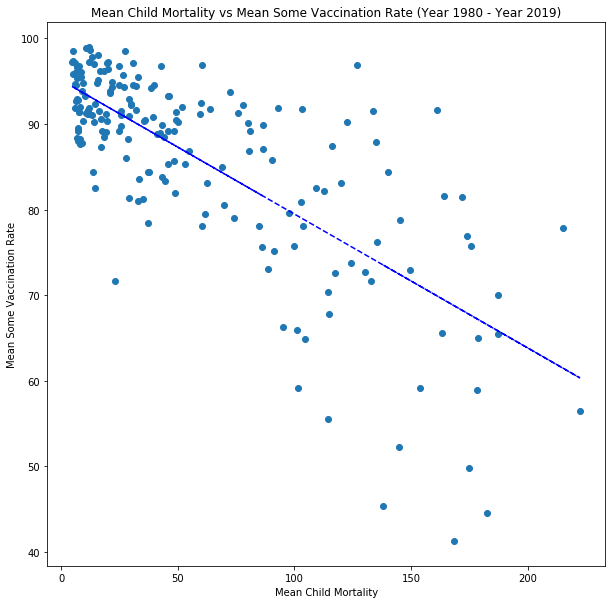

In [196]:
# Scatter plot with trendline
x = df_cm_join_some_vr['0_cm']
y = df_cm_join_some_vr['0_some_vr']
fig, ax = plt.subplots(figsize=[10, 10])
_ = ax.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "b--")
plt.xlabel('Mean Child Mortality')
plt.ylabel('Mean Some Vaccination Rate')
plt.title("Mean Child Mortality vs Mean Some Vaccination Rate (Year 1980 - Year 2019)")
plt.show()

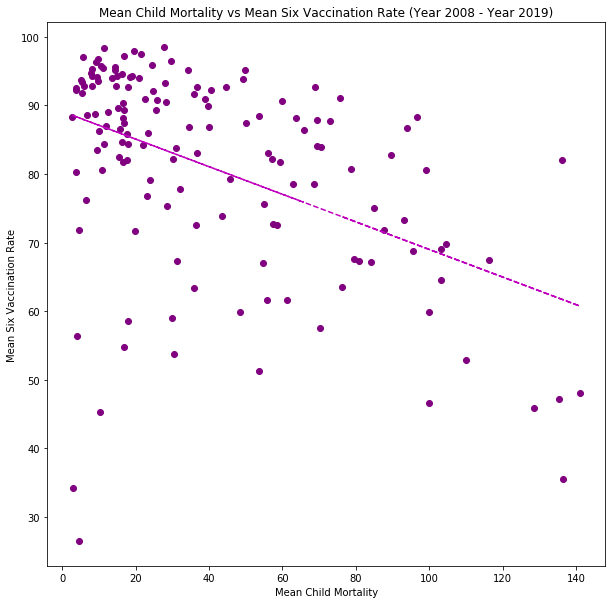

In [197]:
# Scatter plot with trendline
x = df_cm_join_six_vr['0_cm']
y = df_cm_join_six_vr['0_six_vr']
fig, ax = plt.subplots(figsize=[10, 10])
_ = ax.scatter(x, y, c='purple')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "m--")
plt.xlabel('Mean Child Mortality')
plt.ylabel('Mean Six Vaccination Rate')
plt.title("Mean Child Mortality vs Mean Six Vaccination Rate (Year 2008 - Year 2019)")
plt.show()

Both mean some vaccination rate and mean six vaccination rate have negative correlation to child mortality.<br>
<br>
The dots of both charts are more concentrated on the top left corner. This indicates that in modern times, a majority of countries have achieved both high vaccination rate and low child mortality.

Compare the correlation cofficients between 
1. Mean Child Mortality and Mean Some Vaccination Rate, and
2. Mean Child Mortality and Mean Six Vaccination Rate

In [198]:
# Calculate the correlation coefficient of Mean Child Mortality and Mean Some Vaccination Rate
df_cm_join_some_vr.corr()

,0_cm,0_some_vr
0_cm,1.000000,-0.738575
0_some_vr,-0.738575,1.000000


In [199]:
# Calculate the correlation coefficient of Mean Child Mortality and Mean Six Vaccination Rate
df_cm_join_six_vr.corr()

,0_cm,0_six_vr
0_cm,1.000000,-0.459424
0_six_vr,-0.459424,1.000000


Compared to mean some vaccination rate, mean six vaccination rate has a relatively weaker negative correlation to Mean Child Mortality (-0.74 vs -0.46).

### 4. How are child mortality and income per person correlated?

Find out the mean child mortality and mean income per person by country, and do a scatter plot.

As the year ranges of 'df_child_mortality_v2' and 'df_income_per_person_v3' are already match after the 'Data Cleaning' part, no further process is required to align the year ranges of both dataframes.
+ df_child_mortality_v2: From 1950 to 2020
+ df_income_per_person_v3: From 1950 to 2020

In [200]:
# Calculate the mean child mortality from 1950 to 2020 by country and store as a new dataframe
s_cm_mean_by_country = df_child_mortality_v2.mean(axis=1)
df_cm_mean_by_country = pd.DataFrame(s_cm_mean_by_country)
# Calculate the mean income_per_person from 1950 to 2020 by country and store as a new dataframe
s_ipp_mean_by_country = df_income_per_person_v3.mean(axis=1)
df_ipp_mean_by_country = pd.DataFrame(s_ipp_mean_by_country)

In [201]:
# Create a new dataframe by joining 'df_cm_mean_by_country' and 'df_ipp_mean_by_country' on the country index
df_cm_join_ipp = df_cm_mean_by_country.join(df_ipp_mean_by_country, how='inner', lsuffix='_cm', rsuffix='_ipp')

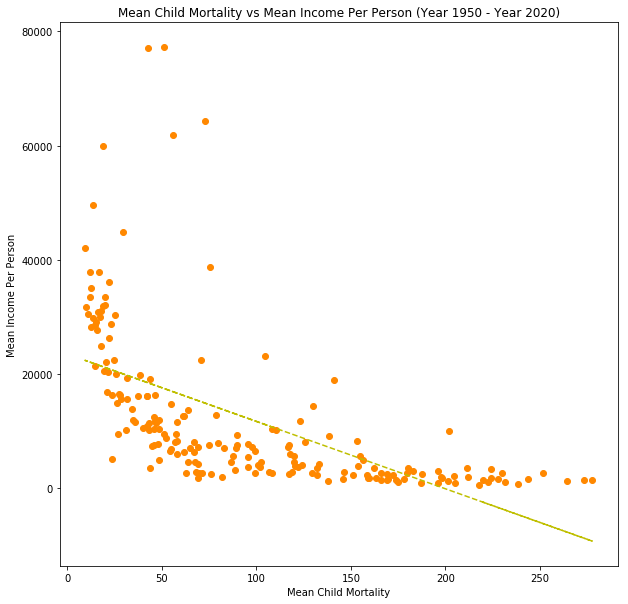

In [202]:
# Scatter plot with trendline
x = df_cm_join_ipp['0_cm']
y = df_cm_join_ipp['0_ipp']
fig, ax = plt.subplots(figsize=[10, 10])
_ = ax.scatter(x, y, c='#FF8800')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "y--")
plt.xlabel('Mean Child Mortality')
plt.ylabel('Mean Income Per Person')
plt.title("Mean Child Mortality vs Mean Income Per Person (Year 1950 - Year 2020)")
plt.show()

In [203]:
# Calculate the correlation coefficient of Mean Child Mortality and Mean Income Per Person
df_cm_join_ipp.corr()

,0_cm,0_ipp
0_cm,1.000000,-0.581951
0_ipp,-0.581951,1.000000


The plot shows negative correlation between the mean child mortality and the mean income per person. 

Note that the dots tend to form a curve which is convex to the origin, and a fairly large number of dots are concentrated on the botton left of the chart. This indicates that both low income per person and low child mortality co-exist in some countries.

<a id='conclusions'></a>
## Conclusions

The following conclusions are drawn based on the analysis:

1. Among the top 20 countries with the highest mean child mortality, 18 of them are Africa countries. In particular, over half of them (11) are located in West Africa.<br>
<br>
2. Among the top 20 countries with the lowest mean child mortality, 15 of them are European countries. Japan is the only Asian country in this ranking.<br>
<br>
3. Child mortality has been decreasing since 1950. The decrease rate tends to slow down over the period. The decreasing trend can be served as a reference to predict the child mortality for global and individual countries.<br>
<br>
4. Both mean some vaccination rate and mean six vaccination rate have negative correlation to mean child mortality. Mean Six Vaccination Rate has a relatively weaker negative correlation.<br>
<br>
5. In modern times (after 1980), a majority of countries have achieved both high vaccination rate on at least 1 common vaccine and low child mortality.<br>
<br>
6. Mean income per person has negative correlation to mean child mortality. However, in some countries, both low income per person and low child mortality co-exist.<br>

Further researches on the effectiveness of each vaccine to reducing child mortality can be done if other data such as the vaccination rates for each vaccine are available. Comparison on the child mortality can also be done between a vaccinated child group and an unvaccinated child group to find out whether a specific vaccine can bring down child mortality.


### Limitations

For the vaccination rate datasets, there are many missing values particular for the early years. Recall that the following approach has been adopted to fill those values:<br>
1. Trim the earliest years with over half of their values missing (null).
2. The null values of the new earliest year is filled by its mean values over all available countries.
3. Use linear interpolate() to fill out the null values of the remaining years between the new earliest year and the latest year of the dataset.

The above approach assumes all available countries have similar trends, with similar rate of increasing or decreasing over the years. The cleaned data may not be able to reflect cases which do not belong to majority. Due to the strong majority, the extreme data samples may have less influence on the data analysis.


In [204]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0